In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df=pd.read_csv("lung_cancer.csv")
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [48]:
df=df.drop("Name", axis=1)

In [50]:
df=df.drop("Surname",axis=1)

In [51]:
df.isna().sum()

Age       0
Smokes    0
AreaQ     0
Alkhol    0
Result    0
dtype: int64

In [52]:
df.dtypes

Age       int64
Smokes    int64
AreaQ     int64
Alkhol    int64
Result    int64
dtype: object

In [53]:
df.tail()

,Age,Smokes,AreaQ,Alkhol,Result
54,26,13,6,1,0
55,77,20,5,4,1
56,75,15,3,5,1
57,43,30,3,8,1
58,51,25,9,0,0


In [54]:
df.drop_duplicates(inplace=True)
df.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


In [55]:
df.dtypes

Age       int64
Smokes    int64
AreaQ     int64
Alkhol    int64
Result    int64
dtype: object

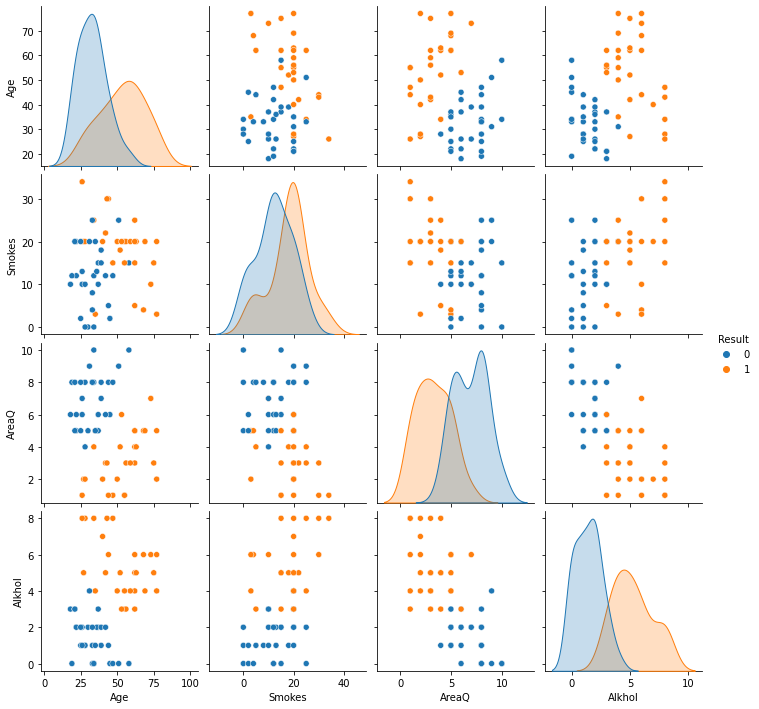

In [56]:
sns.pairplot(data=df, hue = 'Result')

<AxesSubplot:>

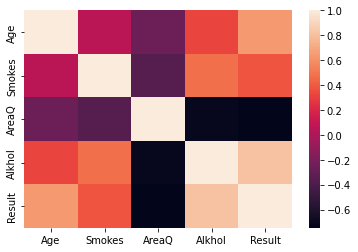

In [57]:
sns.heatmap(df.corr())

In [58]:
df.dtypes

Age       int64
Smokes    int64
AreaQ     int64
Alkhol    int64
Result    int64
dtype: object

In [59]:
target=df['Result']

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
df1 = df.copy()

In [62]:
X = df1

In [63]:
target

0     1
1     1
2     0
3     0
4     1
5     0
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    1
14    1
15    0
16    1
17    0
18    1
19    1
20    1
21    0
22    0
23    0
24    1
25    0
26    0
27    0
28    1
29    1
30    0
31    1
32    1
33    1
34    0
35    0
36    1
37    1
38    0
39    0
40    1
41    0
42    1
43    1
44    0
45    0
46    0
47    0
48    1
49    1
50    0
51    1
52    1
53    0
54    0
55    1
56    1
57    1
58    0
Name: Result, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [65]:
y = target

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 10)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (41, 5)
Testing split input-  (18, 5)


In [67]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [68]:
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         4

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



Text(0.5, 1.0, 'Accuracy Score: 1.0')

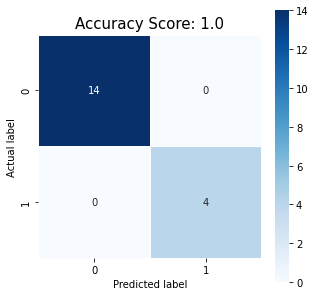

In [69]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

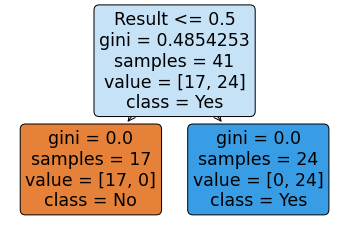

In [72]:
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, 
                     class_names =["No","Yes"] , filled = True , precision = 7, rounded = True)